SALES PREDICTION USING PYTHON

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = "advertising.csv"
df = pd.read_csv(file_path)

In [3]:
print("\n First 5 rows of the dataset:")
print(df.head())


 First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
print("\n Checking for missing values:")
print(df.isnull().sum())


 Checking for missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [5]:
print("\n Dataset Information:")
print(df.info())


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


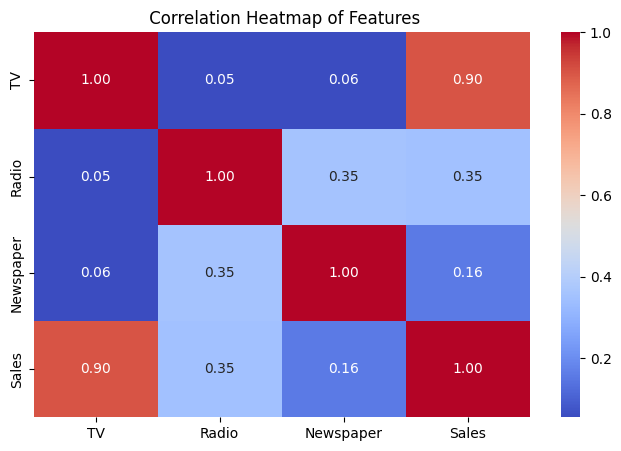

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Correlation Heatmap of Features")
plt.show()

In [7]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test_scaled)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"\n📊 Model Performance:")
print(f" Mean Squared Error: {mse:.2f}")
print(f" R² Score: {r2:.2f}")


📊 Model Performance:
 Mean Squared Error: 2.91
 R² Score: 0.91


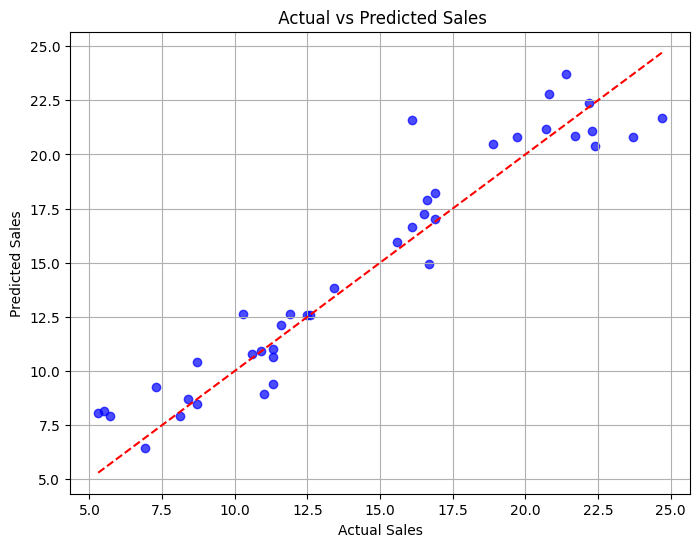

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')  # Diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(" Actual vs Predicted Sales")
plt.grid()
plt.show()

In [15]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\n🔍 Feature Importance (Coefficients):")
print(feature_importance.sort_values(by="Coefficient", ascending=False))


🔍 Feature Importance (Coefficients):
     Feature  Coefficient
0         TV     4.587208
1      Radio     1.489840
2  Newspaper     0.087916
